/tmp/ipykernel_27/4124495763.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', 3)


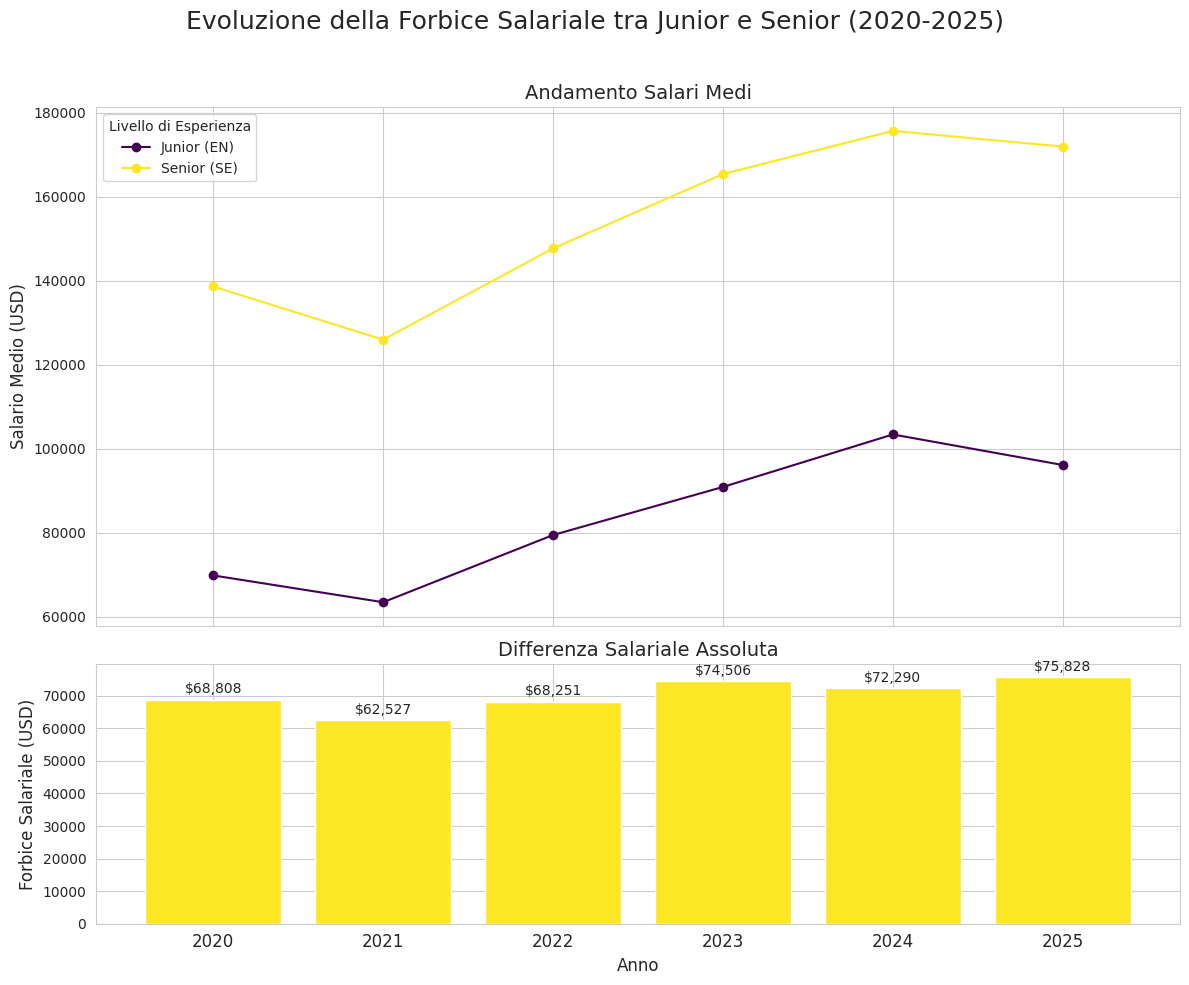

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm 

df = pd.read_csv("/kaggle/input/salaries-for-data-science-jobs/salaries.csv")
df_filtered = df[df['experience_level'].isin(['EN', 'SE'])].copy()

salary_trends = df_filtered.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack()
salary_trends['gap'] = salary_trends['SE'] - salary_trends['EN']

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('Evoluzione della Forbice Salariale tra Junior e Senior (2020-2025)', fontsize=18)

colors = cm.get_cmap('viridis', 3)

axes[0].plot(salary_trends.index, salary_trends['EN'], marker='o', linestyle='-', label='Junior (EN)', color=colors(0.25))
axes[0].plot(salary_trends.index, salary_trends['SE'], marker='o', linestyle='-', label='Senior (SE)', color=colors(0.75))
axes[0].set_ylabel('Salario Medio (USD)', fontsize=12)
axes[0].legend(title='Livello di Esperienza')
axes[0].set_title('Andamento Salari Medi', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[1].bar(salary_trends.index, salary_trends['gap'], color=colors(0.9), label='Differenza (SE - EN)')
axes[1].set_xlabel('Anno', fontsize=12)
axes[1].set_ylabel('Forbice Salariale (USD)', fontsize=12)
axes[1].set_title('Differenza Salariale Assoluta', fontsize=14)
axes[1].set_xticks(salary_trends.index)
axes[1].tick_params(axis='x', labelsize=12)

for i, v in enumerate(salary_trends['gap']):
    axes[1].text(salary_trends.index[i], v + 1000, f"${v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adegua il layout per fare spazio al titolo principale
plt.savefig("forbice_salariale_junior_senior.png")
plt.show()

